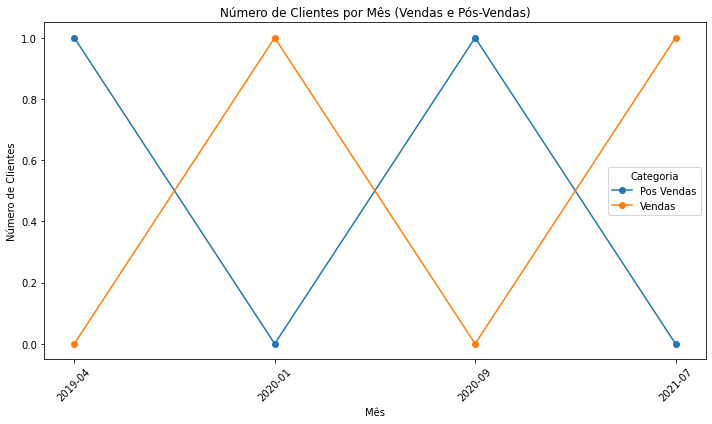

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de criação de um DataFrame (substitua isso com seus próprios dados)
data = {
    'CPF': ['11111111111', '22222222222', '33333333333', '44444444444'],
    'Data_Venda': ['2020-01-15', '2019-04-20', '2021-07-05', '2020-09-10'],
    'Categoria': ['Vendas', 'Pos Vendas', 'Vendas', 'Pos Vendas']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Convertendo a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Adicionando uma coluna 'Ano' para facilitar a filtragem
df['Ano'] = df['Data_Venda'].dt.year

# Filtrando os anos desejados (2019 a 2021)
df = df[df['Ano'].between(2019, 2021)]

# Agrupando por mês e categoria, contando clientes únicos
clientes_por_mes = df.groupby([df['Data_Venda'].dt.strftime('%Y-%m'), 'Categoria'])['CPF'].nunique().unstack().fillna(0)

# Plotando o gráfico de linhas
clientes_por_mes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Número de Clientes por Mês (Vendas e Pós-Vendas)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes')
plt.legend(title='Categoria')
plt.xticks(range(len(clientes_por_mes)), clientes_por_mes.index, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de criação de um DataFrame (substitua isso com seus próprios dados)
data = {
    'CPF': ['11111111111', '22222222222', '33333333333', '44444444444'],
    'Data_Venda': ['2020-01-15', '2019-04-20', '2021-07-05', '2020-09-10'],
    'Categoria': ['Vendas', 'Pos Vendas', 'Vendas', 'Pos Vendas']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Convertendo a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Adicionando uma coluna 'Ano' para facilitar a filtragem
df['Ano'] = df['Data_Venda'].dt.year

# Filtrando os anos desejados (2019 a 2021)
df = df[df['Ano'].between(2019, 2021)]

# Agrupando por mês e categoria, contando clientes únicos
clientes_por_mes = df.groupby([df['Data_Venda'].dt.strftime('%Y-%m'), 'Categoria'])['CPF'].nunique().unstack().fillna(0)

# Calculando o número total de clientes por mês
clientes_por_mes['Total'] = clientes_por_mes.sum(axis=1)

# Plotando o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as linhas para vendas e pós-vendas
clientes_por_mes.drop('Total', axis=1).plot(kind='line', marker='o', ax=ax)

# Adicionando a linha com o total de clientes por mês
clientes_por_mes['Total'].plot(kind='line', marker='o', color='black', linestyle='--', linewidth=2, ax=ax)

plt.title('Número de Clientes por Mês (Vendas e Pós-Vendas)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes')
plt.legend(title='Categoria')
plt.xticks(range(len(clientes_por_mes)), clientes_por_mes.index, rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Samsung\Datasets\Clientes ativos.csv", sep=';')
df

,Categoria,CPF,Data_Venda
0,Vendas,69059243005,01/01/2016
1,Vendas,17862233840,01/01/2016
2,pos venda,7480757204,01/01/2016
3,pos venda,5611615007,01/01/2016
4,Vendas,13234500339,01/01/2016
...,...,...,...
23792,Vendas,5987086061992,31/12/2018
23793,Vendas,5991904941075,31/12/2018
23794,pos venda,5996723820159,31/12/2018
23795,pos venda,6001542699242,31/12/2018


In [2]:
# Convertendo a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])


C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2016' in DD/MM/YYYY format. Provide format o

In [3]:
# Agrupando por mês e categoria, contando clientes únicos
clientes_por_mes = df.groupby([df['Data_Venda'].dt.strftime('%m-%Y'), 'Categoria'])['CPF'].nunique().unstack().fillna(0)
clientes_por_mes

Categoria,Vendas,pos venda
Data_Venda,,
01-2016,279,217
01-2017,385,334
01-2018,441,375
02-2016,181,152
02-2017,239,235
02-2018,308,250
03-2016,214,166
03-2017,227,225
03-2018,353,287


In [4]:
clientes_por_mes['Total'] = df.groupby(df['Data_Venda'].dt.strftime('%m-%Y'))['CPF'].nunique()

In [5]:
clientes_por_mes

Categoria,Vendas,pos venda,Total
Data_Venda,,,
01-2016,279,217,496
01-2017,385,334,648
01-2018,441,375,672
02-2016,181,152,320
02-2017,239,235,447
02-2018,308,250,482
03-2016,214,166,378
03-2017,227,225,413
03-2018,353,287,590


In [9]:
clientes_por_mes.index = pd.to_datetime(clientes_por_mes.index, format='%m-%Y')
clientes_por_mes = clientes_por_mes.sort_index()
clientes_por_mes

Categoria,Vendas,pos venda,Total
Data_Venda,,,
2016-01-01,279,217,496
2016-02-01,181,152,320
2016-03-01,214,166,378
2016-04-01,179,143,312
2016-05-01,188,194,379
2016-06-01,189,164,353
2016-07-01,242,250,492
2016-08-01,189,162,343
2016-09-01,231,195,425


AttributeError: 'Index' object has no attribute 'strftime'

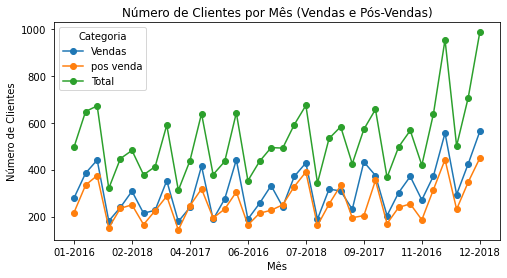

In [5]:
clientes_por_mes.plot(kind='line', marker='o', figsize=(8, 4))
plt.title('Número de Clientes por Mês (Vendas e Pós-Vendas)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes')
plt.legend(title='Categoria')
plt.xticks(range(len(clientes_por_mes)), clientes_por_mes.index.strftime('%m-%Y'), rotation=45)
plt.tight_layout()
plt.show()

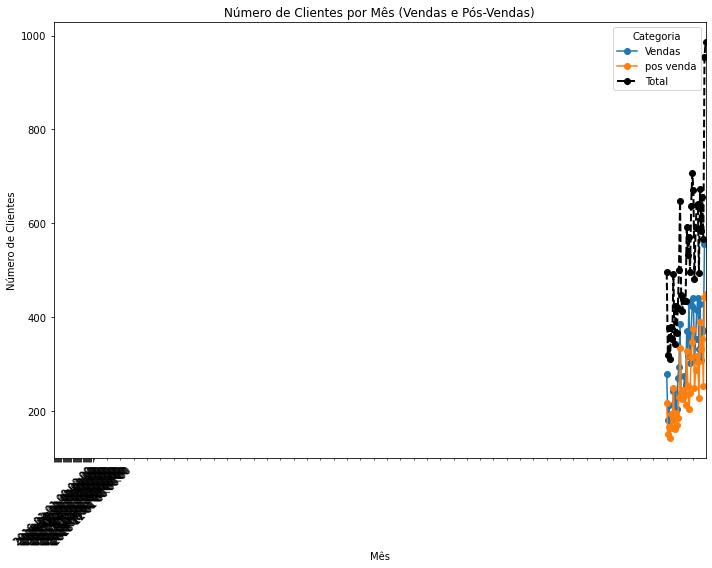

In [8]:
# Plotando o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 8))

# Plotando as linhas para vendas e pós-vendas
clientes_por_mes.drop('Total', axis=1).plot(kind='line', marker='o', ax=ax)

# Adicionando a linha com o total de clientes por mês
clientes_por_mes['Total'].plot(kind='line', marker='o', color='black', linestyle='--', linewidth=2, ax=ax)

plt.title('Número de Clientes por Mês (Vendas e Pós-Vendas)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes')
plt.legend(title='Categoria')
plt.xticks(range(len(clientes_por_mes)), clientes_por_mes.index, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {
    'CPF': ['11111111111', '22222222222', '33333333333', '11111111111', '44444444444'],
    'Data_Venda': ['2019-01-15', '2019-01-20', '2020-03-10', '2021-05-05', '2022-07-12'],
    'Categoria': ['Vendas', 'Vendas', 'Pós-vendas', 'Vendas', 'Pós-vendas']
}

df = pd.DataFrame(data)
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Adicionar coluna de mês e ano
df['Ano'] = df['Data_Venda'].dt.year
df['Mês'] = df['Data_Venda'].dt.month

# Contagem de clientes distintos por categoria por mês
clientes_por_mes = df.groupby(['Ano', 'Mês', 'Categoria'])['CPF'].nunique().reset_index()

# Filtrar por categoria e criar gráfico
categorias = clientes_por_mes['Categoria'].unique()

plt.figure(figsize=(10, 6))

for categoria in categorias:
    dados_categoria = clientes_por_mes[clientes_por_mes['Categoria'] == categoria]
    total_por_mes = dados_categoria.groupby(['Ano', 'Mês'])['CPF'].sum().reset_index()
    plt.plot(total_por_mes.index, total_por_mes['CPF'], label=categoria)

# Total de clientes distintos por mês
total_geral = clientes_por_mes.groupby(['Ano', 'Mês'])['CPF'].sum().reset_index()
plt.plot(total_geral.index, total_geral['CPF'], label='Total Geral', linestyle='--')

plt.xlabel('Mês')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Mês (Vendas e Pós-vendas)')
plt.legend()
plt.xticks(total_geral.index, total_geral.apply(lambda x: f"{x['Ano']}-{x['Mês']:02d}", axis=1), rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {
    'CPF': ['11111111111', '22222222222', '33333333333', '11111111111', '44444444444'],
    'Data_Venda': ['2019-01-15', '2019-01-20', '2020-03-10', '2021-05-05', '2022-07-12'],
    'Categoria': ['Vendas', 'Vendas', 'Pós-vendas', 'Vendas', 'Pós-vendas']
}

df = pd.DataFrame(data)
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
df

In [ ]:
# Adicionar coluna de mês e ano
df['Ano'] = df['Data_Venda'].dt.year
df['Mês'] = df['Data_Venda'].dt.month
df

In [ ]:
# Contagem de clientes distintos por categoria por mês
clientes_por_mes = df.groupby(['Ano', 'Mês', 'Categoria'])['CPF'].nunique().reset_index()
clientes_por_mes

In [ ]:
# Filtrar por categoria e criar gráfico
categorias = clientes_por_mes['Categoria'].unique()
plt.figure(figsize=(10, 6))
for categoria in categorias:
    dados_categoria = clientes_por_mes[clientes_por_mes['Categoria'] == categoria]
    total_por_mes = dados_categoria.groupby(['Ano', 'Mês'])['CPF'].sum().reset_index()
    plt.plot(total_por_mes.index, total_por_mes['CPF'], label=categoria)

In [ ]:
# Calculando o número total de clientes distintos por mês
clientes_por_mes['Total'] = df.groupby(df['Data_Venda'].dt.strftime('%Y-%m'))['CPF'].nunique()

# Plotando as linhas para vendas, pós-vendas e o total de clientes distintos por mês
clientes_por_mes.plot(kind='line', marker='o', ax=ax)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de criação de um DataFrame (substitua isso com seus próprios dados)
data = {
    'CPF': ['11111111111', '22222222222', '33333333333', '44444444444'],
    'Data_Venda': ['2020-01-15', '2019-04-20', '2021-07-05', '2020-09-10'],
    'Categoria': ['Vendas', 'Pos Vendas', 'Vendas', 'Pos Vendas']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Convertendo a coluna 'Data_Venda' para o tipo datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Adicionando uma coluna 'Ano' para facilitar a filtragem
df['Ano'] = df['Data_Venda'].dt.year

# Filtrando os anos desejados (2019 a 2021)
df = df[df['Ano'].between(2019, 2021)]

# Agrupando por mês e categoria, contando clientes únicos
clientes_por_mes = df.groupby([df['Data_Venda'].dt.strftime('%Y-%m'), 'Categoria'])['CPF'].nunique().unstack().fillna(0)

# Ordenando o índice (meses e anos) de forma crescente
clientes_por_mes.index = pd.to_datetime(clientes_por_mes.index)
clientes_por_mes = clientes_por_mes.sort_index()

# Plotando o gráfico de linhas
clientes_por_mes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Número de Clientes por Mês (Vendas e Pós-Vendas)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes')
plt.legend(title='Categoria')
plt.xticks(range(len(clientes_por_mes)), clientes_por_mes.index.strftime('%Y-%m'), rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calculando o valor total de vendas por mês e categoria
valor_vendas = df.groupby([df['Data_Venda'].dt.strftime('%Y-%m'), 'Categoria'])['Valor'].sum().unstack().fillna(0)

# Adicionando a coluna 'Valor_Vendas' ao DataFrame clientes_por_mes
clientes_por_mes['Valor_Vendas'] = valor_vendas.sum(axis=1)  # Soma dos valores de vendas por mês

# Plotando o gráfico de linhas para o valor de vendas por mês e categoria
fig, ax = plt.subplots(figsize=(10, 6))

categorias = valor_vendas.columns
for categoria in categorias:
    ax.plot(valor_vendas.index, valor_vendas[categoria], marker='o', label=f'{categoria}')

ax.plot(clientes_por_mes.index, clientes_por_mes['Valor_Vendas'], marker='o', label='Total', linestyle='--', color='black')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor de Vendas')
ax.set_title('Valor de Vendas por Mês e Categoria')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
